---
title: "Fine Tunning Model"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-06"
categories: [python, datacamp, machine learning, supervised ]
image: "FineTunning.jpg"

---

# Fine Tunning Model

After training models, you'll learn how to assess them in this chapter. You'll learn how to analyze classification model performance using scikit-learn by using several metrics and a visualization technique. Using hyperparameter tuning, you will also be able to optimize classification and regression models.

This **Fine Tunning Model** is part of [Datacamp course: Supervised Learning with scikit-learn](https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn)

This is my learning experience of data science through DataCamp

# **Optimizing your model**

After training your model, we must evaluate its performance. In this section, we will explore some of the other metrics available in scikit-learn for assessing our model's performance. Using hyperparameter tuning, you can optimize your classification and regression models.

![](ConfusionMatrix.png)

**Classification metrics**

Chapter 1 evaluated the accuracy of your k-NN classifier. As Andy discussed, accuracy is not always an informative metric. By computing a confusion matrix and generating a classification report, you will evaluate the performance of binary classifiers.

The classification report consisted of three rows and an additional support column, as shown in the video. In the video example, the support was the number of Republicans or Democrats in the test set used to compute the classification report. These columns gave the precision, recall, and f1-score metrics for that particular class.

This tutorial uses the [PIMA Indians](https://www.kaggle.com/uciml/pima-indians-diabetes-database) dataset available at the UCI Machine Learning Repository. Based on factors such as BMI, age, and number of pregnancies, we can predict whether or not a given female patient will develop diabetes. As a result, it is a binary classification problem. Diabetes is not present in a patient with a target value of 0, whereas diabetes is present in a patient with a target value of 1. To deal with missing values, the dataset has been preprocessed in earlier excercises.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
df=pd.read_csv('diabetes.csv')

df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()))
y = df['diabetes']
X = df.drop('diabetes', axis=1)

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[176  30]
 [ 52  50]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       206
           1       0.62      0.49      0.55       102

    accuracy                           0.73       308
   macro avg       0.70      0.67      0.68       308
weighted avg       0.72      0.73      0.72       308



By analyzing the confusion matrix and classification report, you can get a much better understanding of your classifier's performance.

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate

![](ReceiverOperatorCharacteristic(ROC)Curve.png)![](LogisticRegressionAndLinearDecisionBoundary.png)

**Building a logistic regression model**

Time to build your first logistic regression model! As Hugo showed in the video, scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out!

In [14]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(solver="liblinear")

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 35  67]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       206
           1       0.69      0.66      0.67       102

    accuracy                           0.79       308
   macro avg       0.76      0.76      0.76       308
weighted avg       0.79      0.79      0.79       308



**ROC curve plotting**

The previous exercise was a great success - you now have a new classifier in your toolbox!

Model performance can be evaluated quantitatively using classification reports and confusion matrices, while visually using ROC curves. Most scikit-learn classifiers have a .predict_proba() method that returns the probability of a given sample being in a particular class, as Hugo demonstrated in the video. After building a logistic regression model, you will plot an ROC curve to evaluate its performance. As a result, you will become familiar with the .predict_proba() method.

You'll continue working with the PIMA Indians diabetes dataset here

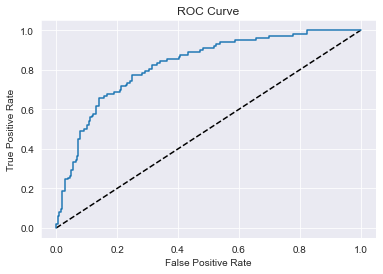

In [15]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

**Curve of precision-recall**

We may have noticed that your ROC curve's y-axis (True positive rate) is also known as recall. ROC curves are not the only way to evaluate model performance visually. Precision-recall curves are generated by plotting precision and recall at different thresholds. Recall that precision and recall are defined as follows:

![](Precission-recallCurve.png)

The precision-recall curve for the diabetes dataset can be seen below. IPython Shell displays the classification report and confusion matrix.

Take a look at the precision-recall curve and then consider the following statements. Pick the statement that is not true. If the individual has diabetes, the class is positive (1).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       206
           1       0.69      0.66      0.67       102

    accuracy                           0.79       308
   macro avg       0.76      0.76      0.76       308
weighted avg       0.79      0.79      0.79       308

[[176  30]
 [ 35  67]]


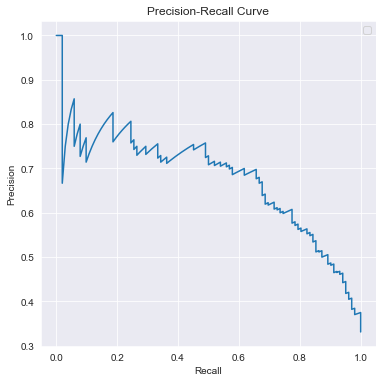

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#

df = pd.read_csv('diabetes.csv')

df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()))

#
y = df['diabetes']
X = df.drop('diabetes', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

#
clf = LogisticRegression(solver="liblinear")#add solver by Jinny
clf.fit(X_train, y_train)

#
from sklearn.metrics import precision_recall_curve

#
y_pred_prob = clf.predict_proba(X_test)[:,1]

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

#
plt.figure(figsize=(6, 6), dpi=None)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#


df = pd.read_csv('diabetes.csv')

df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()))
y = df['diabetes']
X = df.drop('diabetes', axis=1)
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 52  50]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       206
           1       0.62      0.49      0.55       102

    accuracy                           0.73       308
   macro avg       0.70      0.67      0.68       308
weighted avg       0.72      0.73      0.72       308



**Compute the AUC**

Suppose we have a binary classifier that makes guesses at random. It would be correct approximately 50% of the time, and the ROC curve would be a diagonal line where the True Positive Rate and False Positive Rate are always equal. This ROC curve has an Area under it of 0.5. Hugo discussed the AUC in the video as an informative metric for evaluating models. The model is better than random guessing if the AUC is greater than 0.5. Always a good sign!

We will calculate AUC scores on the diabetes dataset using the roc_auc_score() function from sklearn.metrics.

In [18]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8255282695602512
AUC scores computed using 5-fold cross-validation: [0.80203704 0.80648148 0.81481481 0.86264151 0.8554717 ]


**Hyperparameter tuning with GridSearchCV**

Using GridSearchCV on the voting dataset, we tune the n_neighbors parameter of KNeighborsClassifier(). Now we will practice this thoroughly using logistic regression on the diabetes dataset instead!

We saw earlier that logistic regression also has a regularization parameter: C. This parameter controls the inverse of regularization strength. A large number can result in an overfit model, while a small number can result in an underfit model.

You have been provided with the hyperparameter space for C. We will use GridSearchCV and logistic regression to find the optimal C. X represents the feature array and Y represents the target variable array.

This is why we haven't separated the data into training and test sets. I agree with your observation! We will focus on setting up the hyperparameter grid and performing grid-search cross-validation. In practice, we will indeed want to hold out a portion of your data for evaluation purposes, and you will learn all about this in the next video!

In [19]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(solver="liblinear")

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.7708768355827178


**Hyperparameter tuning with RandomizedSearchCV**

GridSearchCV is computationally expensive, especially when dealing with multiple hyperparameters and large hyperparameter spaces. To solve this problem, RandomizedSearchCV can be used, in which not all hyperparameter values are tested. A fixed number of hyperparameter settings is instead sampled from specified probability distributions. In this exercise, you will practice using RandomizedSearchCV.

You will also be introduced to a new model: the Decision Tree. You don't need to worry about the specifics of how this model works. In scikit-learn, decision trees also have .fit() and .predict() methods, just like k-NN, linear regression, and logistic regression. In RandomizedSearchCV, decision trees are ideal because they have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf.

The diabetes dataset has been preloaded with the feature array X and target variable array Y. You have been given the hyperparameter settings. To determine the optimal hyperparameters, you will use RandomizedSearchCV

In [20]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 5}
Best score is 0.7422629657923776


**Hold-out set in practice I: Classification**

We will now practice evaluating a model with tuned hyperparameters on a hold-out set. X and Y have been preloaded from the diabetes dataset as feature arrays and target variable arrays, respectively.

In addition to CC, logistic regression also has a 'penalty' hyperparameter that specifies whether 'l1' or 'l2' regularization should be used. This exercise requires you to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV.

In [21]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(solver='liblinear')

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.4393970560760795, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.7673913043478262


**Hold-out set in practice II: Regression**

Remember lasso and ridge regression from the previous chapter? Lasso used the
penalty to regularize, while ridge used the penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties:

![](HoldOutSet-Regression.png)

In scikit-learn, this term is represented by the 'l1_ratio'parameter: An 'l1_ratio' of 1 corresponds to an L1L1penalty, and anything lower is a combination of L1 and L2.

In this exercise, you will GridSearchCV to tune the 'l1_ratio' of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.

In [22]:
df = pd.read_csv('gapminder-clean.csv')
y = df['life'].values
X = df.drop('life', axis=1).values

# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Now that we have basic understanding how to fine-tune your models, it's time to learn about preprocessing techniques and how to piece together all the different stages of the machine learning process into a pipeline!